In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import matplotlib.pyplot as plt
print("Done!")

Done!


In [2]:
"""Classes """
class rand_memory: #class for generating random numbers used as the amplitude of a signal
    def __init__(self, value=0):
        self.value=np.random.randint(low_amplitude, high_amplitude)


class markers: #this class is for counters used in generating the pulses
    def __init__(self, value=0):
        self.value=0
    def plus_one(self):
        self.value +=1


class conditions(): #This is used for knowing if a pulse is happening and the code will keep generating the pulse if the value is True
    def __init__(self, state=False):
        self.state=False
    def set_true(self):
        self.state=True
    def set_false(self):
        self.state=False

print("Done!")

Done!


In [3]:
"""Function """
#not used here
def display_stats(signal, t_axis, threshold, plot_size):
    if len(t_axis)%plot_size==0:

        print("plot n°: ", t_axis[-1] // plot_size)
        print("--------------------------------------------------------")

        plt.plot(t_axis[-plot_size:], signal[-plot_size:])
        plt.xlabel("Time (ns)")
        plt.ylabel("Voltage (mV)")
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)
        plt.title("Random signal and random pulses")
        plt.show()

def display_n_plots(t_axis,signals,n,threshold,plot_size):
    if t_axis[-1]%plot_size==0:
        print("plot n°: ", t_axis[-1] // plot_size)
        print("--------------------------------------------------------")
        fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Adjust the figure size
        y_limits = (-250, 250)
        for i, ax in enumerate(axs.flat):
            ax.plot(t_axis[-plot_size:], signals[i][-plot_size:], label=f'Channel {i + 1}')
            ax.set_title(f'Channel {i + 1}', fontsize=10)
            ax.set_ylim(y_limits)
            ax.grid(True, lw=0.5)
            ax.label_outer()  # Only show outer labels to avoid redundancy
        fig.suptitle('16 Controlled channels', fontsize=22)  # Add a super title
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit super title


        #plt.savefig(f'Figure {int(t_axis[-1] //200)+1} w 16 Controlled channels')
        plt.show()


def smart_append(t_axis,array,new_point,max_size):
    if t_axis[-1]<max_size:
        array=np.append(array,new_point)
    else:
        array=np.append(array[1:], new_point)
    return array


def create_n_signals(n, likelihood, signal_limit,plot_size,conds, wave_counts ,amps ):

    pulses=[]
    for i in range(n):
        if conds[i].state==False:
            sig=0
            wave_counts[i].__init__()
            if np.random.randint(likelihood*plot_size)==1:
                conds[i].set_true()

        else:
            sig=burst_waveform(wave_counts[i].value, amps[i].value)
            #sig=amps[i].value
            wave_counts[i].plus_one()
            if wave_counts[i].value>signal_limit:
                conds[i].set_false()
                amps[i].__init__()

        pulses.append(sig)
    return np.sum(pulses)

def random_generator( mean, std_dev, conds,wave_counts, amps, likelihood,n, signal_limit):

    rand_point = np.random.normal(loc=mean, scale=std_dev) #this generates the background noise
    #rand_point=0

    signals=create_n_signals(n, likelihood, signal_limit,plot_size,conds, wave_counts, amps) #this makes sure that the simulated signal is random and is able to have multiple superposed pulses.

    next_point= rand_point + signals

    return next_point

print("Done!")

Done!


In [4]:
""" Different waveforms """
def burst_waveform( time, amp ):
    A = amp
    B = 10.0
    C = 10.0
    omega = 1.2
    k = 1.0

    cosine_term   = A * math.cos( omega * time )      # oscillation
    heaviside_term = 1 / (1 + math.exp( -2*k*time ) ) # turn-on (heaviside step function parameterized)
    exponent_term = math.exp( -(time - B)/C )         # attenuation

    voltage = cosine_term * heaviside_term * exponent_term
    return voltage

print("Done!")

Done!


In [5]:
"""Variables and parameters """
#these are values used to generate noise
mean = 0
std_dev = 15

threshold = 75 #trigger threshold --not used here
delay_period= 30 #the delay of time to wait when a threshold is exceeded -- not used here
low_amplitude, high_amplitude= lo,hi = 35, 150 # the upper limit and lower limit of the amplitudes of the random pulses



likelihood= 2 #probability of occurance of random pulses (Higher makes it less probable, n is around 1 occurance per n cycles)
plot_size= 200 #Data points in one plot
max_size= 1000 #the maximum number of points in the signal arrays kept at any time (this includes t_axis) (to protect the RAM)
n_of_plots=16 #number of channels and plots
signal_limit=40 #the length of each generated signal/ pulse if less than 30 it would clearly cutoff the signals
n_signals= 3 #the maxiumum number of super-imposed signals in each channel

print("Done!")


Done!


plot n°:  1
--------------------------------------------------------


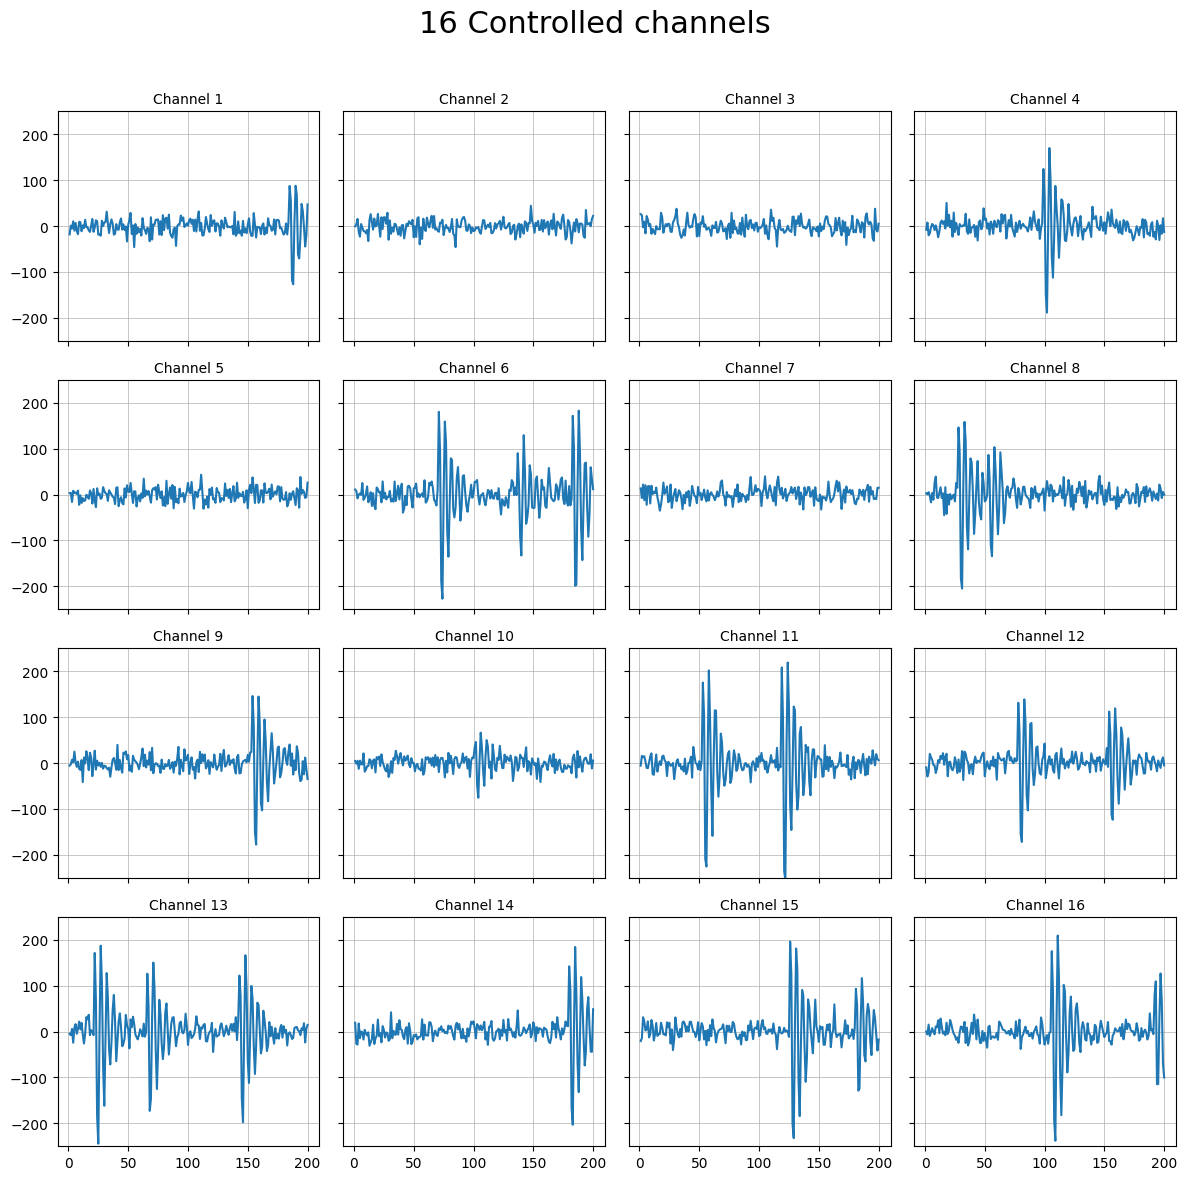

plot n°:  2
--------------------------------------------------------


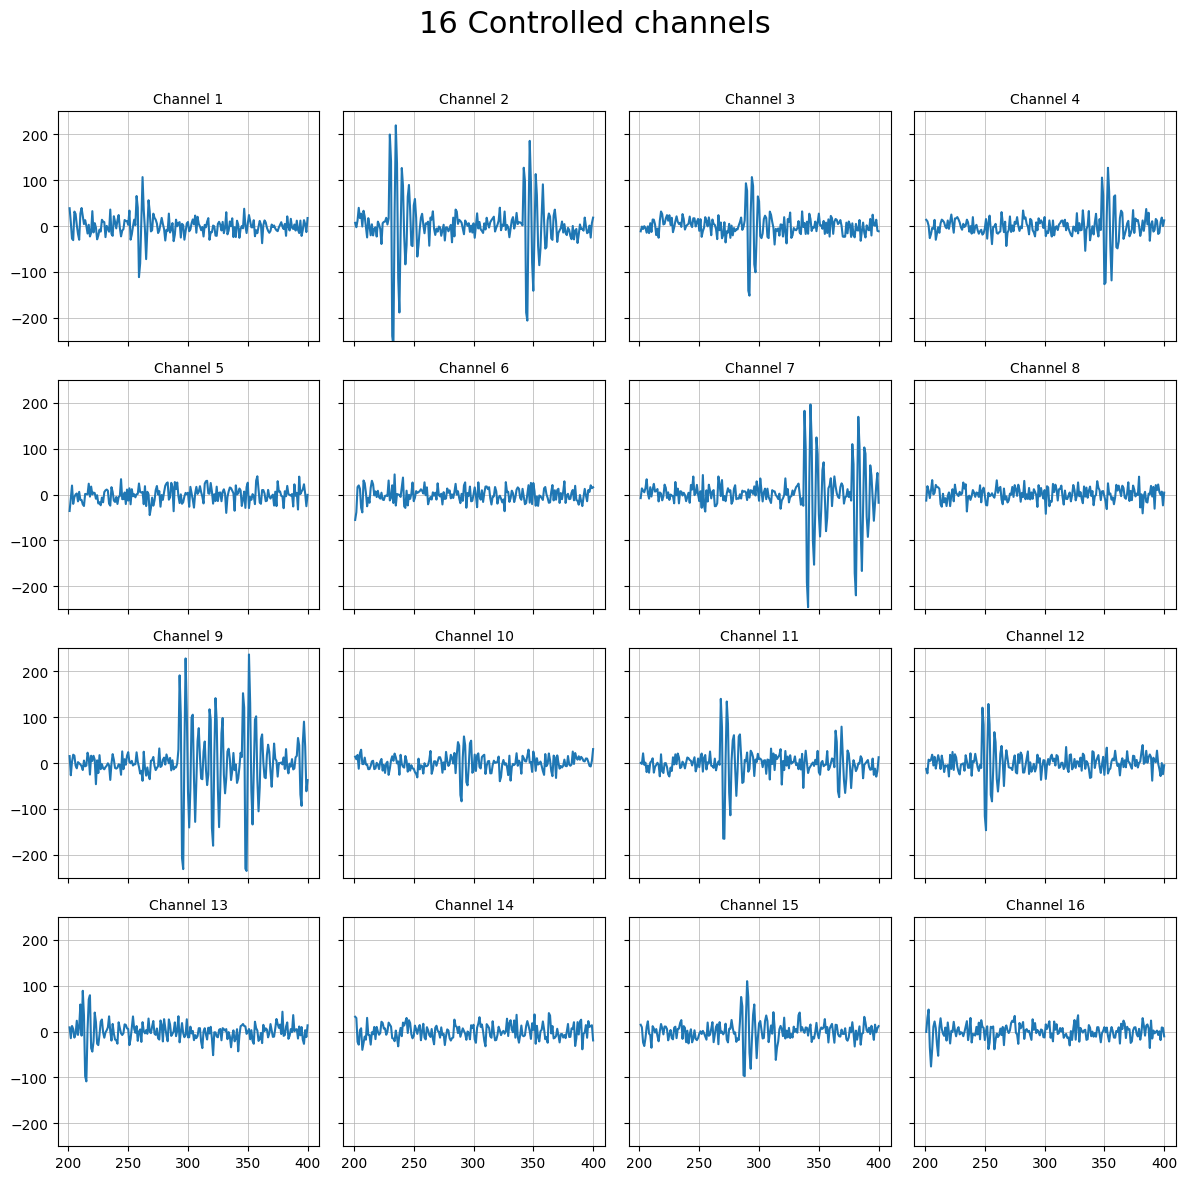

Done!


In [6]:
"""Compiler """

t_axis = np.array([0]) #This is the general time axis that is common for all channels
amps, wave_counts, conds= [], [], []  #the conditions that help track the progression of the signals using the classes

for i in range(n_of_plots):
    amps.append([rand_memory(),rand_memory(),rand_memory()])
    wave_counts.append([markers(),markers(),markers()])
    conds.append([conditions(),conditions(),conditions()])


signals=[] #generate empty arrays for the different channels
for i in range(n_of_plots):
    signals.append(np.array([0]))


#while True:
for i in range(1+ plot_size*2 ): #choosing the number of plots to plot, replace by while True to keep going until stopped

    t_axis= smart_append(t_axis, t_axis, t_axis[-1]+1, max_size-1) #adds +1 to time each cycle, and limits the len(t_axis) to max_size


    for n in range(n_of_plots): #this generates signals for the different channels
        Information = random_generator(mean, std_dev, conds[n], wave_counts[n], amps[n], likelihood, n_signals, signal_limit)
        signals[n] = smart_append(t_axis, signals[n], Information, max_size)


    display_n_plots(t_axis, signals, n_of_plots, threshold, plot_size) #function to plot the channels
    time.sleep(0.000001) #delay condition to help prevent oveloading the processor/ not sure how helpful this is

print("Done!")
